<a href="https://colab.research.google.com/github/pkmariya/Scaler01/blob/master/Walmart_CaseStudy_Mariya_DSMLJune22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Case Study

# 1. Objective

##### Identify the Customer characteristics

### Import Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson

### Import and read the dataset

In [2]:
dataset_url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094"
wmart_df = pd.read_csv(dataset_url)

# 2. Statistical Summary


### List the data properties

##### Basic info of the dataset

In [ ]:
# Basic info of the dataset
wmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


##### Description of the dataset

In [ ]:
# Description of the dataset
wmart_df.describe(include="all")

User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  \
count                      550068   550068.000000     550068.000000   
unique                          5             NaN               NaN   
top                             1             NaN               NaN   
freq                       193821             NaN               NaN   
mean                          NaN        0.409653          5.404270   
std                           NaN        0.491770          3.936211   
min                           NaN        0.000000          1.000000   
25%                           NaN        0.000000          1.000000   
50%                           NaN        0.000000          5.000000   
75%                           NaN        1.000000          8.000000   
max                           NaN        1.000000         20.000000   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

##### Size of the dataset

In [ ]:
# Size of the datset. 
wmart_df.size

5500680

##### Shape of the dataset

In [ ]:
wmart_df.shape

(550068, 10)

###### Shape of the dataset indicates, there are 5 lakhs plus records with 10 columns

##### Columns/Product Attributes

In [ ]:
wmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

##### Data Types of Product Attributes

In [ ]:
# Data types of each attributes
wmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# COunt of each attributes
for col in wmart_df.columns:
  print(f'{col} : ', wmart_df[col].nunique())

User_ID :  5891
Product_ID :  3631
Gender :  2
Age :  7
Occupation :  21
City_Category :  3
Stay_In_Current_City_Years :  5
Marital_Status :  2
Product_Category :  20
Purchase :  18105


###### From the above result, we can observe that there are, 
###### -- 3 Continuous variables - User_ID, Product_ID, and Purchase
###### -- 7 Categorical varibales - Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status and Product_Category

##### Top 5 Rows

In [ ]:
wmart_df.head(5)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

##### Bottom 5 Rows

In [ ]:
wmart_df.tail(5)

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

# 3. Data Pre-processing
### Data Preparation

##### Check for Null Values

In [ ]:
wmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

###### Above result indicates that, there is no null value for any of the attributes in the given dataset.

##### Check for duplicates

In [ ]:
wmart_df.duplicated().sum()

0

##### take a copy of the Dataset

In [3]:
working_df = wmart_df.copy()

##### Data Type Updates

In [ ]:
# Convert the attributes to appropriate types
working_df['Gender'] = working_df['Gender'].astype('category')
working_df['Age'] = working_df['Age'].astype('category')
working_df['Occupation'] = working_df['Occupation'].astype('category')
working_df['City_Category'] = working_df['City_Category'].astype('category')
working_df['Stay_In_Current_City_Years'] = working_df['Stay_In_Current_City_Years'].astype('category')
working_df['Marital_Status'] = working_df['Marital_Status'].astype('category')
working_df['Product_Category'] = working_df['Product_Category'].astype('category')

In [ ]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


In [ ]:
# Give meaningful names to the 'Marital Status' attribute values
working_df['Marital_Status'].replace([0, 1], ['Single', 'Partnered'], inplace=True)

# 4. Exploratory Data Analysis
### Graphical & non-graphical analysis of Uni & Bi-variate elements

##### Count by Products

In [ ]:
# Count of each products
prod_cnt = {'Products Count ' : working_df['Product_ID'].value_counts()}
prod_cnt = pd.DataFrame(prod_cnt)
prod_cnt

Products Count 
P00265242             1880
P00025442             1615
P00110742             1612
P00112142             1562
P00057642             1470
...                    ...
P00314842                1
P00298842                1
P00231642                1
P00204442                1
P00066342                1

[3631 rows x 1 columns]

In [ ]:
prod_cnt.head(25)

Products Count 
P00265242             1880
P00025442             1615
P00110742             1612
P00112142             1562
P00057642             1470
P00184942             1440
P00046742             1438
P00058042             1422
P00059442             1406
P00145042             1406
P00237542             1394
P00255842             1383
P00117942             1364
P00110942             1360
P00010742             1350
P00220442             1282
P00110842             1281
P00117442             1260
P00051442             1249
P00102642             1246
P00278642             1226
P00242742             1215
P00034742             1212
P00148642             1204
P00080342             1203

In [ ]:
# Count of each products
prod_cnt = {'Products Count ' : working_df['Product_ID'].unique()}
prod_cnt = pd.DataFrame(prod_cnt)
prod_cnt

Products Count 
0          P00069042
1          P00248942
2          P00087842
3          P00085442
4          P00285442
...              ...
3626       P00375436
3627       P00372445
3628       P00370293
3629       P00371644
3630       P00370853

[3631 rows x 1 columns]

In [ ]:
working_df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
# Gender counts
gender_cnt = working_df['Gender'].value_counts()
gender_cnt

M    414259
F    135809
Name: Gender, dtype: int64

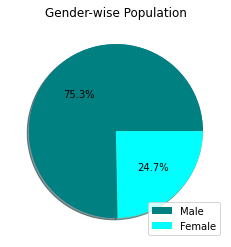

In [ ]:
plt.pie(gender_cnt, autopct='%.1f%%')
plt.title("Gender-wise Population")
# plt.legend(working_df['Gender'].unique())

labels = ['Male', 'Female']
colors = ['teal', 'cyan']

patches, texts = plt.pie(gender_cnt, colors=colors, shadow=True)
plt.legend(patches, labels, loc='lower right')

plt.show()

In [ ]:
working_df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
city_category_cnt = working_df['City_Category'].value_counts()
city_category_cnt

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

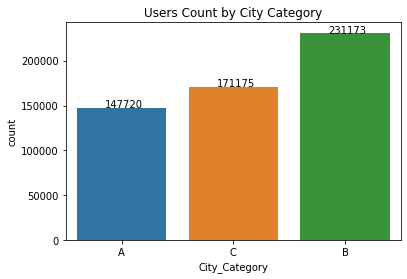

In [ ]:
# Count of Users in each city
ax = sns.countplot(data=working_df, x='City_Category')
plt.title("Users Count by City Category")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+ 0.05))

plt.show()

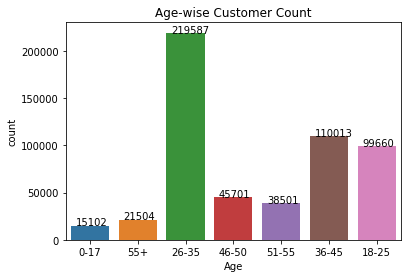

In [ ]:
# Age-wise User ID counts
ax = sns.countplot(data=working_df, x="Age")
plt.title("Age-wise Customer Count")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.10, p.get_height()+0.05))

plt.show()

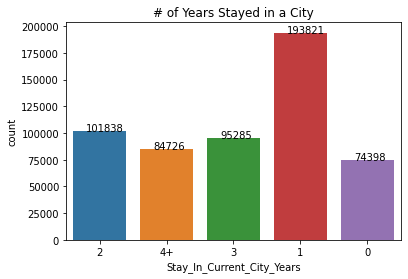

In [ ]:
# # Of years live in a City
ax = sns.countplot(data=working_df, x='Stay_In_Current_City_Years')
plt.title("# of Years Stayed in a City")
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.20, p.get_height()+0.05))

plt.show()

In [ ]:
pd.DataFrame(working_df[working_df.select_dtypes(['int64']).columns].value_counts(), columns=['Count'])

Count
User_ID Purchase       
1005256 8001          5
1005100 10025         5
1002168 8693          4
1002383 6989          4
1001980 8059          4
...                 ...
1001992 7086          1
        6992          1
        6921          1
        6883          1
1006040 23251         1

[539307 rows x 1 columns]

In [ ]:
pd.DataFrame(working_df[working_df.select_dtypes(['object']).columns].value_counts(), columns=['Count'])

Count
Product_ID       
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
...           ...
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1

[3631 rows x 1 columns]

In [ ]:
# Top 5 mean of each category by Purchase value
numerical_columns = working_df.select_dtypes([np.int64, np.float64])
for col in numerical_columns:
  print(f'{col} : ', working_df.groupby(col)['Purchase'].mean().head().sort_values(ascending=False))

User_ID :  User_ID
1000004    14747.714286
1000003    11780.517241
1000002    10525.610390
1000001     9545.514286
1000005     7745.292453
Name: Purchase, dtype: float64
Purchase :  Purchase
25    25.0
24    24.0
14    14.0
13    13.0
12    12.0
Name: Purchase, dtype: float64


In [ ]:
# Top 5 mediian of each category by Purchase value
numerical_columns = working_df.select_dtypes([np.int64, np.float64])
for col in numerical_columns:
  print(f'{col} : ', working_df.groupby(col)['Purchase'].median().head().sort_values(ascending=False))

User_ID :  User_ID
1000004    15852.5
1000003    12103.0
1000001     9946.0
1000002     9899.0
1000005     6168.0
Name: Purchase, dtype: float64
Purchase :  Purchase
25    25.0
24    24.0
14    14.0
13    13.0
12    12.0
Name: Purchase, dtype: float64


### Numerical Variables Analysis

In [ ]:
numerical_columns = working_df.select_dtypes([np.int64, np.float64])
print('********* Descriptive Analysis ********* \n')
for col in numerical_columns:
  print(f'Column Name {col}')
  output = working_df.groupby("Marital_Status").describe(percentiles=[.25, .5, .75])[col]
  display(output)
  print("*** _____________________________________________________________________________________________ ***\n")

********* Descriptive Analysis ********* 

Column Name User_ID


count          mean          std        min        25%  \
Marital_Status                                                              
0               324731.0  1.002999e+06  1700.465995  1000001.0  1001524.0   
1               225337.0  1.003071e+06  1765.090842  1000004.0  1001506.0   

                      50%        75%        max  
Marital_Status                                   
0               1003065.0  1004386.0  1006040.0  
1               1003093.0  1004647.0  1006039.0

*** _____________________________________________________________________________________________ ***

Column Name Purchase


count         mean          std   min     25%     50%  \
Marital_Status                                                             
0               324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   
1               225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   

                    75%      max  
Marital_Status                    
0               12061.0  23961.0  
1               12042.0  23961.0

*** _____________________________________________________________________________________________ ***



### Categorical Variables Analysis

In [ ]:
print(f"Categorical Variables are: {working_df.select_dtypes(['category']).columns}")

Categorical Variables are: Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'],
      dtype='object')


In [ ]:
# Value Counts
for col in working_df.select_dtypes('category'):
  display(working_df[col].unique())

['F', 'M']
Categories (2, object): ['F', 'M']

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

[10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]

['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

[0, 1]
Categories (2, int64): [0, 1]

[3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1, 2, 3, 4, ..., 17, 18, 19, 20]

In [ ]:
pd.DataFrame(working_df[working_df.select_dtypes(['category']).columns].value_counts(), columns=['Count'])

Count
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status Product_Category       
M      18-25 4          B             1                          0              1                  1113
                                                                                5                  1041
                                      4+                         0              1                   947
                                                                                5                   901
       26-35 7          A             1                          0              1                   793
...                                                                                                 ...
F      51-55 14         C             1                          1              20                    1
M      46-50 7          A             1                          1              10                    1
F      51-55 16         A             3                          0              6                     1
M      46-50 7          A             1                          1              6                     1
F      0-17  0          A             2                          0              1                     1

[29839 rows x 1 columns]

## Visual Analysis
### Univariate Analysis

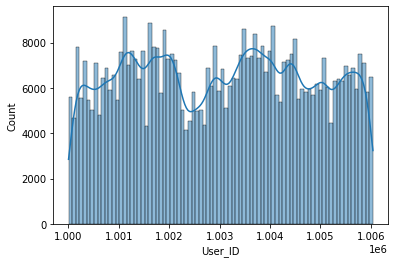

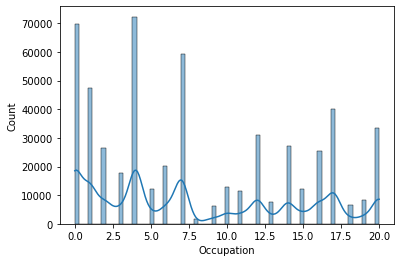

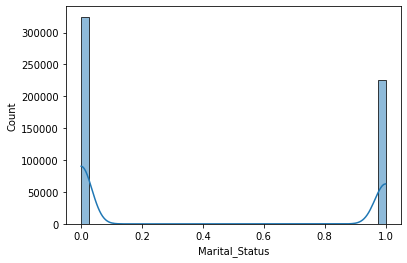

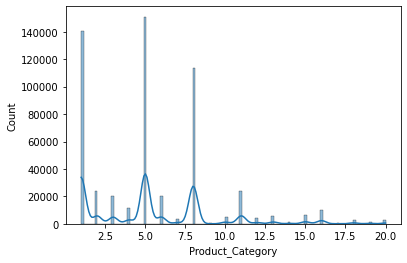

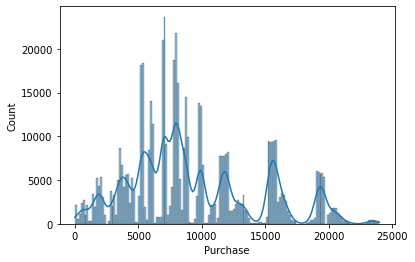

In [ ]:
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  num_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

In [4]:
object_variables = working_df.select_dtypes(['object'])
for col in object_variables:
  obj_graph = sns.histplot(data=working_df, x=col, kde=True)
  plt.show()
  print()

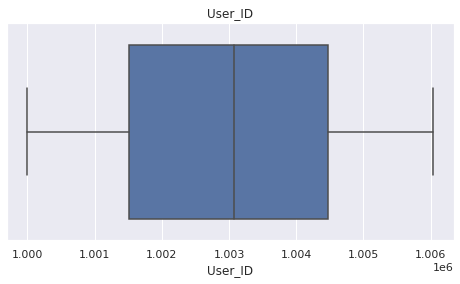

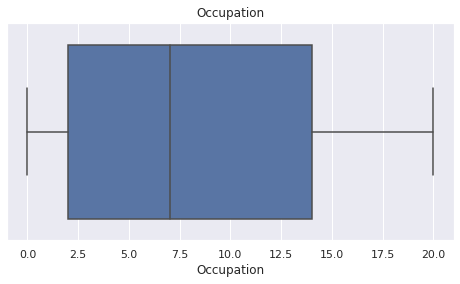

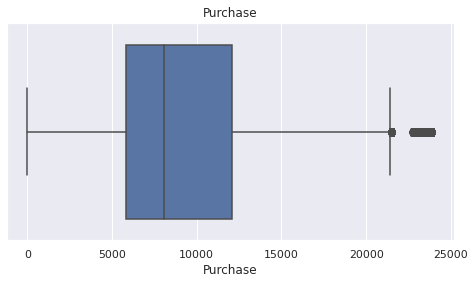

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize': (8, 4)})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col)
  g.set(title=f'{col}')
  plt.show()
  print()

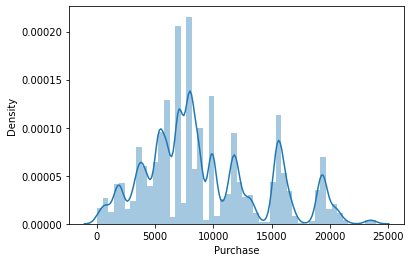

In [ ]:
# Purchase value distribution
sns.distplot(working_df['Purchase'], hist=True, kde=True)

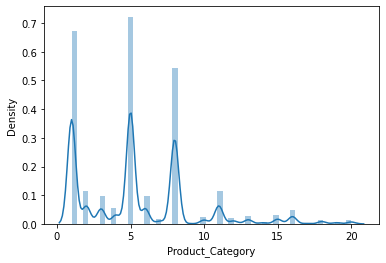

In [ ]:
sns.distplot(working_df['Product_Category'], hist=True, kde=True)

### Bivariate Analysis

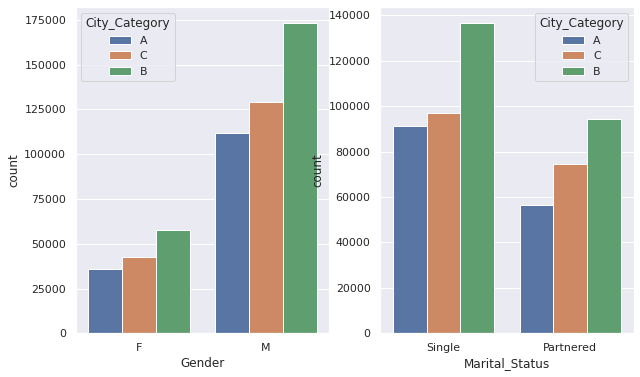

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (10, 10)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='City_Category', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='City_Category', ax=ax[1])
plt.show()

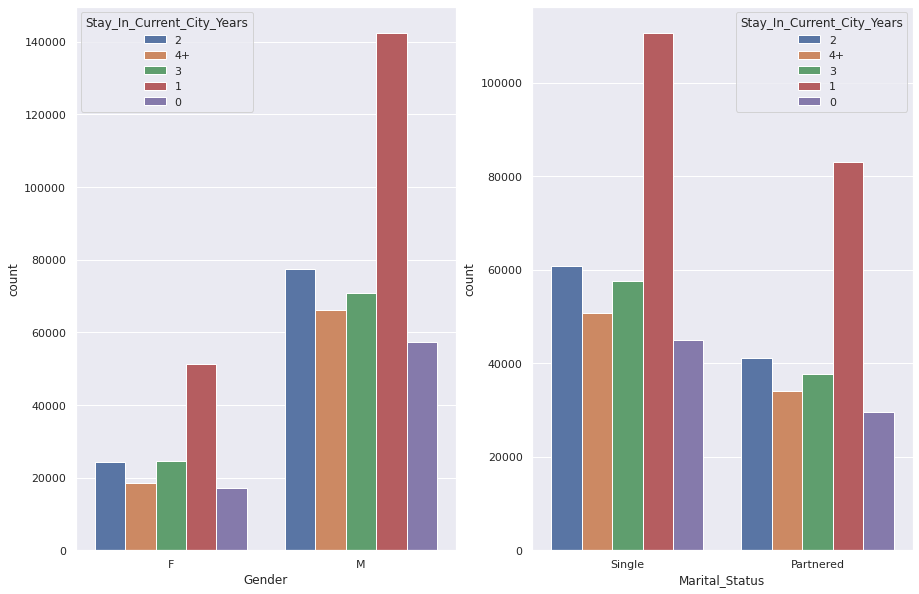

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 10)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='Stay_In_Current_City_Years', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='Stay_In_Current_City_Years', ax=ax[1])
plt.show()

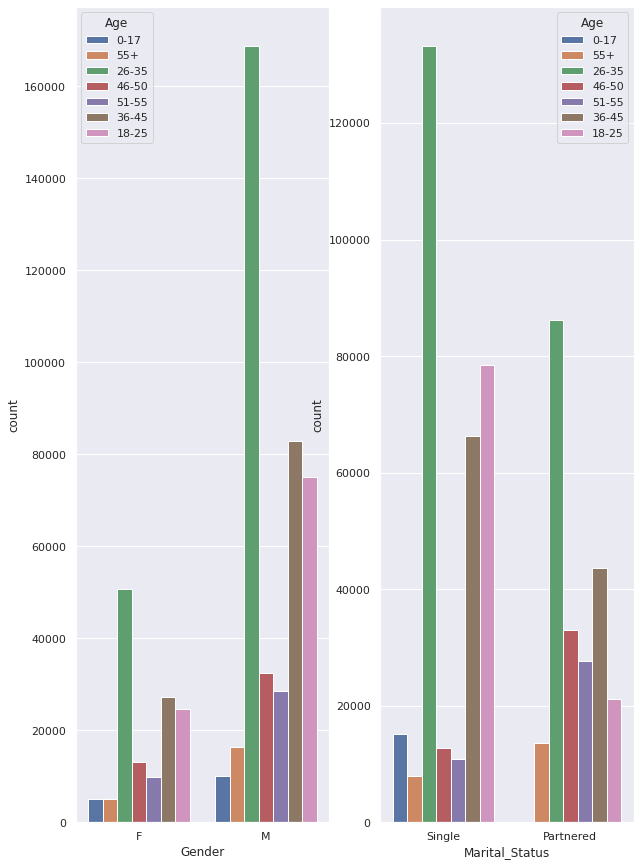

In [ ]:
fig, ax = plt.subplots(1, 2)
sns.set(rc = {'figure.figsize': (7, 10)})
sub1 = sns.countplot(data=working_df, x='Gender', hue='Age', ax=ax[0])
sub2 = sns.countplot(data=working_df, x='Marital_Status', hue='Age', ax=ax[1])
plt.show()

### Boxplot for Categorical Variables

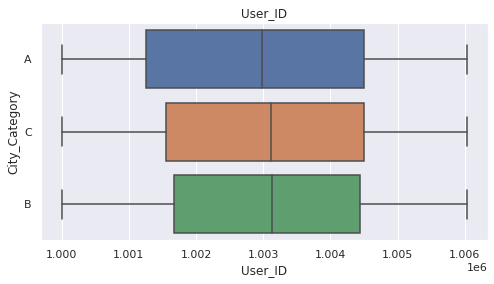

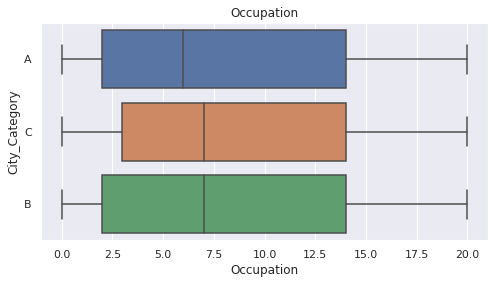

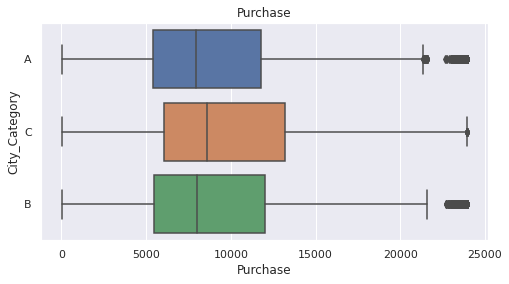

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='City_Category')
  g.set(title=f'{col}')
  plt.show()
  print()

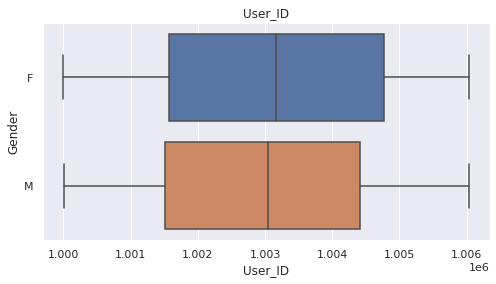

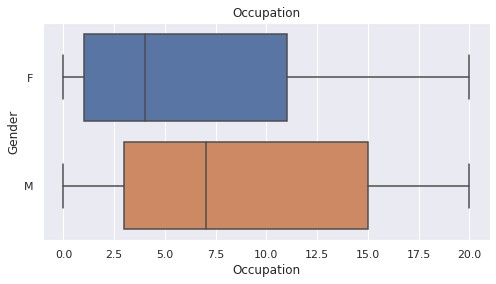

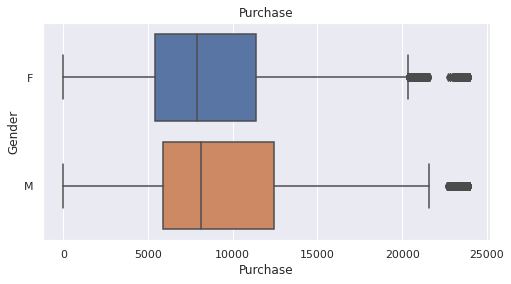

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Gender')
  g.set(title=f'{col}')
  plt.show()
  print()

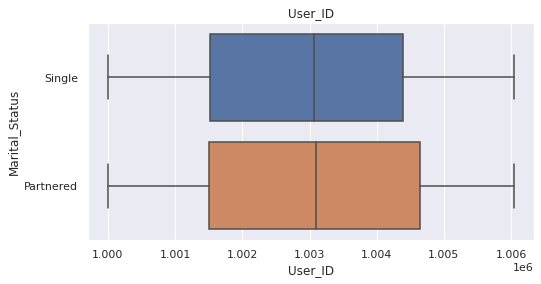

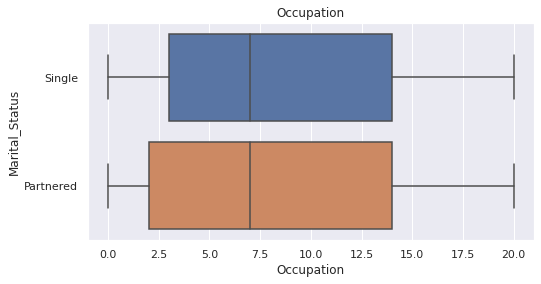

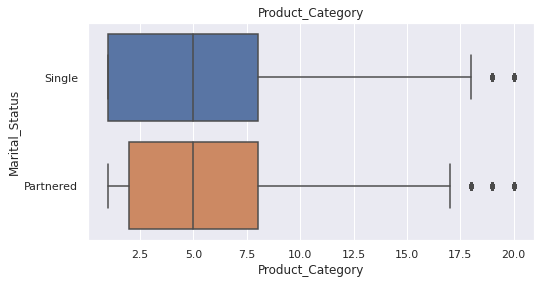

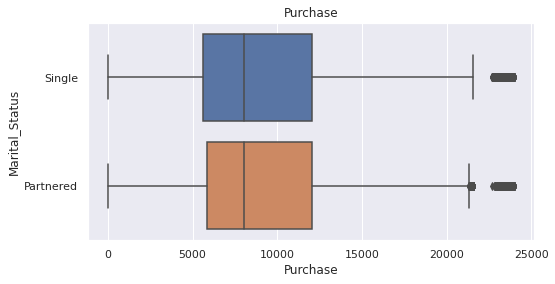

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Marital_Status')
  g.set(title=f'{col}')
  plt.show()
  print()

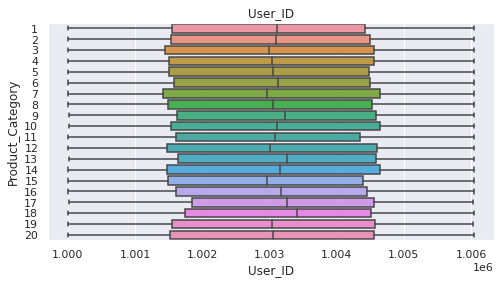

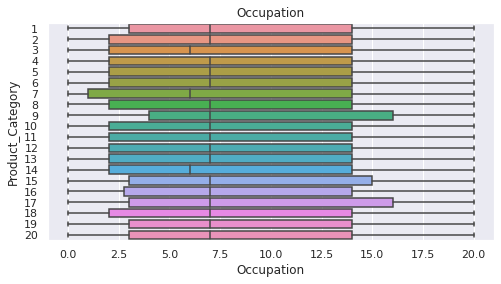

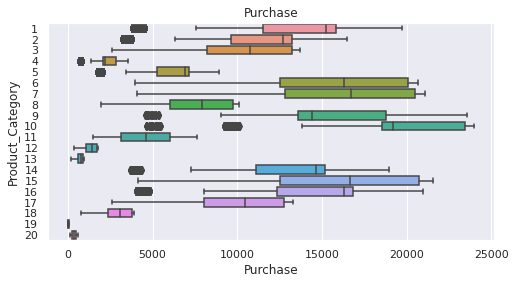

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize' : {8,4}})
numerical_columns = working_df.select_dtypes([np.int64])
for col in numerical_columns:
  g = sns.boxplot(data=working_df, x=col, y='Product_Category')
  g.set(title=f'{col}')
  plt.show()
  print()

In [ ]:
pd.crosstab(index=working_df['Gender'], columns=working_df['Purchase'], margins=True)

Purchase   12   13  14   24   25   26   36   37   38   48  ...  23952  23953  \
Gender                                                     ...                 
F          27   25  30   28   30   27   36   31   34   33  ...      0      0   
M          74   81  65   90   83   85   71   79   80   75  ...      1      2   
All       101  106  95  118  113  112  107  110  114  108  ...      1      2   

Purchase  23954  23955  23956  23958  23959  23960  23961     All  
Gender                                                             
F             0      1      0      0      1      0      0  135809  
M             2      2      1      4      1      4      3  414259  
All           2      3      1      4      2      4      3  550068  

[3 rows x 18106 columns]

In [ ]:
pd.crosstab(index=working_df['Marital_Status'], columns=working_df['Purchase'], margins=True)

Purchase         12   13  14   24   25   26   36   37   38   48  ...  23952  \
Marital_Status                                                   ...          
0                57   63  53   78   69   59   64   67   65   62  ...      1   
1                44   43  42   40   44   53   43   43   49   46  ...      0   
All             101  106  95  118  113  112  107  110  114  108  ...      1   

Purchase        23953  23954  23955  23956  23958  23959  23960  23961     All  
Marital_Status                                                                  
0                   1      1      2      1      2      1      1      2  324731  
1                   1      1      1      0      2      1      3      1  225337  
All                 2      2      3      1      4      2      4      3  550068  

[3 rows x 18106 columns]

In [ ]:
pd.crosstab(index=working_df['Gender'], columns=working_df['City_Category'], margins=True)

City_Category       A       B       C     All
Gender                                       
F               35704   57796   42309  135809
M              112016  173377  128866  414259
All            147720  231173  171175  550068

In [ ]:
pd.crosstab(index=working_df['Gender'], columns=working_df['Product_Category'], margins=True)

Product_Category       1      2      3      4       5      6     7       8  \
Gender                                                                       
F                  24831   5658   6006   3639   41961   4559   943   33558   
M                 115547  18206  14207   8114  108972  15907  2778   80367   
All               140378  23864  20213  11753  150933  20466  3721  113925   

Product_Category    9    10  ...    12    13    14    15    16   17    18  \
Gender                       ...                                            
F                  70  1162  ...  1532  1462   623  1046  2402   62   382   
M                 340  3963  ...  2415  4087   900  5244  7426  516  2743   
All               410  5125  ...  3947  5549  1523  6290  9828  578  3125   

Product_Category    19    20     All  
Gender                                
F                  451   723  135809  
M                 1152  1827  414259  
All               1603  2550  550068  

[3 rows x 21 columns]

In [6]:
from IPython.display import display

for col in object_variables:
  print('Table for', str(col), 'vs Product')
  display(pd.crosstab(working_df[col],working_df['Product_Category'], margins=True, normalize='index'))
  print("\n")

Table for Product_ID vs Product


Product_Category         1         2         3         4        5         6  \
Product_ID                                                                    
P00000142         0.000000  0.000000  1.000000  0.000000  0.00000  0.000000   
P00000242         0.000000  1.000000  0.000000  0.000000  0.00000  0.000000   
P00000342         0.000000  0.000000  0.000000  0.000000  1.00000  0.000000   
P00000442         0.000000  0.000000  0.000000  0.000000  1.00000  0.000000   
P00000542         0.000000  0.000000  0.000000  0.000000  1.00000  0.000000   
...                    ...       ...       ...       ...      ...       ...   
P0099642          0.000000  0.000000  0.000000  0.000000  0.00000  0.000000   
P0099742          0.000000  0.000000  1.000000  0.000000  0.00000  0.000000   
P0099842          0.000000  0.000000  0.000000  0.000000  1.00000  0.000000   
P0099942          0.000000  0.000000  0.000000  0.000000  1.00000  0.000000   
All               0.255201  0.043384  0.036746  0.021366  0.27439  0.037206   

Product_Category         7         8         9        10        11        12  \
Product_ID                                                                     
P00000142         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000242         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000342         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000442         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000542         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                    ...       ...       ...       ...       ...       ...   
P0099642          0.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
P0099742          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099842          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099942          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All               0.006765  0.207111  0.000745  0.009317  0.044153  0.007175   

Product_Category        13        14        15        16        17        18  \
Product_ID                                                                     
P00000142         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000242         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000342         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000442         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000542         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                    ...       ...       ...       ...       ...       ...   
P0099642          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099742          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099842          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099942          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All               0.010088  0.002769  0.011435  0.017867  0.001051  0.005681   

Product_Category        19        20  
Product_ID                            
P00000142         0.000000  0.000000  
P00000242         0.000000  0.000000  
P00000342         0.000000  0.000000  
P00000442         0.000000  0.000000  
P00000542         0.000000  0.000000  
...                    ...       ...  
P0099642          0.000000  0.000000  
P0099742          0.000000  0.000000  
P0099842          0.000000  0.000000  
P0099942          0.000000  0.000000  
All               0.002914  0.004636  

[3632 rows x 20 columns]



Table for Gender vs Product


Product_Category         1         2         3         4         5         6  \
Gender                                                                         
F                 0.182838  0.041661  0.044224  0.026795  0.308971  0.033569   
M                 0.278925  0.043948  0.034295  0.019587  0.263053  0.038399   
All               0.255201  0.043384  0.036746  0.021366  0.274390  0.037206   

Product_Category         7         8         9        10        11        12  \
Gender                                                                         
F                 0.006944  0.247097  0.000515  0.008556  0.034895  0.011281   
M                 0.006706  0.194002  0.000821  0.009566  0.047188  0.005830   
All               0.006765  0.207111  0.000745  0.009317  0.044153  0.007175   

Product_Category        13        14        15        16        17        18  \
Gender                                                                         
F                 0.010765  0.004587  0.007702  0.017687  0.000457  0.002813   
M                 0.009866  0.002173  0.012659  0.017926  0.001246  0.006621   
All               0.010088  0.002769  0.011435  0.017867  0.001051  0.005681   

Product_Category        19        20  
Gender                                
F                 0.003321  0.005324  
M                 0.002781  0.004410  
All               0.002914  0.004636



Table for Age vs Product


Product_Category         1         2         3         4         5         6  \
Age                                                                            
0-17              0.237386  0.053304  0.079460  0.050192  0.286717  0.026420   
18-25             0.270540  0.044431  0.047261  0.024714  0.286193  0.037618   
26-35             0.265266  0.040658  0.034893  0.019090  0.279948  0.038641   
36-45             0.251316  0.044649  0.035032  0.021397  0.267032  0.035441   
46-50             0.229185  0.046060  0.030109  0.021663  0.261942  0.035492   
51-55             0.235033  0.046259  0.023999  0.017610  0.256954  0.037661   
55+               0.205125  0.042085  0.022647  0.014788  0.249581  0.040086   
All               0.255201  0.043384  0.036746  0.021366  0.274390  0.037206   

Product_Category         7         8         9        10        11        12  \
Age                                                                            
0-17              0.003509  0.149517  0.001059  0.007350  0.049000  0.008277   
18-25             0.004826  0.179721  0.000632  0.006051  0.046127  0.004405   
26-35             0.007519  0.201542  0.000701  0.008138  0.044966  0.004991   
36-45             0.007354  0.211757  0.000973  0.011226  0.045022  0.009035   
46-50             0.007155  0.233168  0.000722  0.011378  0.046038  0.011378   
51-55             0.006909  0.242591  0.000753  0.013480  0.037869  0.011246   
55+               0.006231  0.288690  0.000372  0.016276  0.026088  0.015811   
All               0.006765  0.207111  0.000745  0.009317  0.044153  0.007175   

Product_Category        13        14        15        16        17        18  \
Age                                                                            
0-17              0.007416  0.002582  0.010595  0.015164  0.000397  0.001788   
18-25             0.007586  0.002308  0.010275  0.016035  0.000411  0.003402   
26-35             0.009545  0.002568  0.010802  0.018753  0.000578  0.004745   
36-45             0.011362  0.002836  0.012680  0.017771  0.001227  0.006381   
46-50             0.012057  0.003260  0.013173  0.019234  0.002079  0.007680   
51-55             0.012545  0.004000  0.013194  0.017454  0.002779  0.010987   
55+               0.013997  0.003488  0.010649  0.017532  0.003116  0.011207   
All               0.010088  0.002769  0.011435  0.017867  0.001051  0.005681   

Product_Category        19        20  
Age                                   
0-17              0.003907  0.005959  
18-25             0.002759  0.004706  
26-35             0.002564  0.004089  
36-45             0.002909  0.004599  
46-50             0.003260  0.004967  
51-55             0.003480  0.005195  
55+               0.004790  0.007440  
All               0.002914  0.004636



Table for City_Category vs Product


Product_Category         1         2         3         4         5         6  \
City_Category                                                                  
A                 0.237483  0.041572  0.033462  0.020647  0.285750  0.037280   
B                 0.251989  0.045178  0.037145  0.022606  0.277446  0.036881   
C                 0.274830  0.042524  0.039042  0.020313  0.260459  0.037581   
All               0.255201  0.043384  0.036746  0.021366  0.274390  0.037206   

Product_Category         7         8         9        10        11        12  \
City_Category                                                                  
A                 0.008299  0.217838  0.000745  0.009024  0.044686  0.007196   
B                 0.006917  0.205703  0.000753  0.008924  0.045356  0.007246   
C                 0.005234  0.199755  0.000736  0.010101  0.042068  0.007063   
All               0.006765  0.207111  0.000745  0.009317  0.044153  0.007175   

Product_Category        13        14        15        16        17        18  \
City_Category                                                                  
A                 0.010926  0.003256  0.011623  0.019280  0.000819  0.005097   
B                 0.009824  0.002734  0.011411  0.017467  0.001155  0.006008   
C                 0.009721  0.002395  0.011304  0.017187  0.001110  0.005743   
All               0.010088  0.002769  0.011435  0.017867  0.001051  0.005681   

Product_Category        19        20  
City_Category                         
A                 0.001848  0.003168  
B                 0.001999  0.003257  
C                 0.005071  0.007764  
All               0.002914  0.004636



Table for Stay_In_Current_City_Years vs Product


Product_Category                   1         2         3         4         5  \
Stay_In_Current_City_Years                                                     
0                           0.249402  0.043012  0.037488  0.021331  0.276889   
1                           0.251877  0.043231  0.036157  0.021148  0.273974   
2                           0.260345  0.045268  0.038414  0.020955  0.275987   
3                           0.262171  0.044393  0.037624  0.022060  0.276770   
4+                          0.253877  0.040660  0.034452  0.021611  0.268548   
All                         0.255201  0.043384  0.036746  0.021366  0.274390   

Product_Category                   6         7         8         9        10  \
Stay_In_Current_City_Years                                                     
0                           0.036789  0.007500  0.206202  0.000833  0.008938   
1                           0.037488  0.006661  0.212330  0.000681  0.009560   
2                           0.036656  0.005902  0.198727  0.000854  0.008916   
3                           0.036113  0.007241  0.200178  0.000808  0.009582   
4+                          0.038819  0.006857  0.213842  0.000614  0.009277   
All                         0.037206  0.006765  0.207111  0.000745  0.009317   

Product_Category                  11        12        13        14        15  \
Stay_In_Current_City_Years                                                     
0                           0.046843  0.007231  0.010417  0.002903  0.012312   
1                           0.042023  0.007264  0.010350  0.002967  0.011299   
2                           0.045229  0.007198  0.009613  0.002445  0.011351   
3                           0.042021  0.007126  0.009897  0.002477  0.011041   
4+                          0.047766  0.006952  0.009985  0.002915  0.011519   
All                         0.044153  0.007175  0.010088  0.002769  0.011435   

Product_Category                  16        17        18        19        20  
Stay_In_Current_City_Years                                                    
0                           0.017742  0.001156  0.005726  0.002675  0.004610  
1                           0.018213  0.000867  0.006233  0.003132  0.004545  
2                           0.017714  0.001129  0.005165  0.002907  0.005224  
3                           0.017044  0.001207  0.005132  0.002666  0.004450  
4+                          0.018294  0.001109  0.005618  0.002915  0.004367  
All                         0.017867  0.001051  0.005681  0.002914  0.004636

In [8]:
from IPython.display import display

for col in object_variables:
  print('Table for', str(col), 'vs Purchase')
  display(pd.crosstab(working_df[col],working_df['Purchase'], margins=True, normalize=True))
  print("\n")

Table for Product_ID vs Purchase


Purchase          12        13        14        24        25        26  \
Product_ID                                                               
P00000142   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000242   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000342   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000442   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000542   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
P0099642    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099742    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099842    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099942    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All         0.000184  0.000193  0.000173  0.000215  0.000205  0.000204   

Purchase          36      37        38        48  ...     23952     23953  \
Product_ID                                        ...                       
P00000142   0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P00000242   0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P00000342   0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P00000442   0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P00000542   0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
...              ...     ...       ...       ...  ...       ...       ...   
P0099642    0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P0099742    0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P0099842    0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
P0099942    0.000000  0.0000  0.000000  0.000000  ...  0.000000  0.000000   
All         0.000195  0.0002  0.000207  0.000196  ...  0.000002  0.000004   

Purchase       23954     23955     23956     23958     23959     23960  \
Product_ID                                                               
P00000142   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000242   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000342   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000442   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P00000542   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
P0099642    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099742    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099842    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
P0099942    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
All         0.000004  0.000005  0.000002  0.000007  0.000004  0.000007   

Purchase       23961       All  
Product_ID                      
P00000142   0.000000  0.002094  
P00000242   0.000000  0.000684  
P00000342   0.000000  0.000444  
P00000442   0.000000  0.000167  
P00000542   0.000000  0.000271  
...              ...       ...  
P0099642    0.000000  0.000024  
P0099742    0.000000  0.000229  
P0099842    0.000000  0.000185  
P0099942    0.000000  0.000025  
All         0.000005  1.000000  

[3632 rows x 18106 columns]



Table for Gender vs Purchase


Purchase        12        13        14        24        25        26  \
Gender                                                                 
F         0.000049  0.000045  0.000055  0.000051  0.000055  0.000049   
M         0.000135  0.000147  0.000118  0.000164  0.000151  0.000155   
All       0.000184  0.000193  0.000173  0.000215  0.000205  0.000204   

Purchase        36        37        38        48  ...     23952     23953  \
Gender                                            ...                       
F         0.000065  0.000056  0.000062  0.000060  ...  0.000000  0.000000   
M         0.000129  0.000144  0.000145  0.000136  ...  0.000002  0.000004   
All       0.000195  0.000200  0.000207  0.000196  ...  0.000002  0.000004   

Purchase     23954     23955     23956     23958     23959     23960  \
Gender                                                                 
F         0.000000  0.000002  0.000000  0.000000  0.000002  0.000000   
M         0.000004  0.000004  0.000002  0.000007  0.000002  0.000007   
All       0.000004  0.000005  0.000002  0.000007  0.000004  0.000007   

Purchase     23961       All  
Gender                        
F         0.000000  0.246895  
M         0.000005  0.753105  
All       0.000005  1.000000  

[3 rows x 18106 columns]



Table for Age vs Purchase


Purchase        12        13        14        24        25        26  \
Age                                                                    
0-17      0.000005  0.000005  0.000004  0.000009  0.000009  0.000009   
18-25     0.000036  0.000031  0.000035  0.000038  0.000029  0.000029   
26-35     0.000053  0.000091  0.000060  0.000084  0.000062  0.000076   
36-45     0.000042  0.000029  0.000035  0.000040  0.000045  0.000038   
46-50     0.000022  0.000018  0.000013  0.000016  0.000022  0.000022   
51-55     0.000013  0.000009  0.000024  0.000015  0.000022  0.000015   
55+       0.000013  0.000009  0.000004  0.000013  0.000016  0.000015   
All       0.000184  0.000193  0.000173  0.000215  0.000205  0.000204   

Purchase        36        37        38        48  ...     23952     23953  \
Age                                               ...                       
0-17      0.000004  0.000009  0.000009  0.000004  ...  0.000000  0.000002   
18-25     0.000038  0.000038  0.000049  0.000040  ...  0.000002  0.000000   
26-35     0.000062  0.000075  0.000065  0.000064  ...  0.000000  0.000002   
36-45     0.000040  0.000045  0.000045  0.000036  ...  0.000000  0.000000   
46-50     0.000022  0.000011  0.000013  0.000027  ...  0.000000  0.000000   
51-55     0.000020  0.000015  0.000011  0.000007  ...  0.000000  0.000000   
55+       0.000009  0.000007  0.000015  0.000018  ...  0.000000  0.000000   
All       0.000195  0.000200  0.000207  0.000196  ...  0.000002  0.000004   

Purchase     23954     23955     23956     23958     23959     23960  \
Age                                                                    
0-17      0.000000  0.000002  0.000000  0.000000  0.000000  0.000000   
18-25     0.000002  0.000000  0.000000  0.000004  0.000000  0.000000   
26-35     0.000000  0.000002  0.000002  0.000000  0.000002  0.000000   
36-45     0.000000  0.000000  0.000000  0.000000  0.000000  0.000002   
46-50     0.000000  0.000000  0.000000  0.000000  0.000000  0.000002   
51-55     0.000000  0.000000  0.000000  0.000002  0.000002  0.000002   
55+       0.000002  0.000002  0.000000  0.000002  0.000000  0.000002   
All       0.000004  0.000005  0.000002  0.000007  0.000004  0.000007   

Purchase     23961       All  
Age                           
0-17      0.000000  0.027455  
18-25     0.000000  0.181178  
26-35     0.000005  0.399200  
36-45     0.000000  0.199999  
46-50     0.000000  0.083082  
51-55     0.000000  0.069993  
55+       0.000000  0.039093  
All       0.000005  1.000000  

[8 rows x 18106 columns]



Table for City_Category vs Purchase


Purchase             12        13        14        24        25        26  \
City_Category                                                               
A              0.000029  0.000031  0.000027  0.000044  0.000029  0.000042   
B              0.000045  0.000045  0.000053  0.000060  0.000062  0.000055   
C              0.000109  0.000116  0.000093  0.000111  0.000115  0.000107   
All            0.000184  0.000193  0.000173  0.000215  0.000205  0.000204   

Purchase             36        37        38        48  ...     23952  \
City_Category                                          ...             
A              0.000027  0.000031  0.000047  0.000035  ...  0.000000   
B              0.000064  0.000055  0.000049  0.000049  ...  0.000000   
C              0.000104  0.000115  0.000111  0.000113  ...  0.000002   
All            0.000195  0.000200  0.000207  0.000196  ...  0.000002   

Purchase          23953     23954     23955     23956     23958     23959  \
City_Category                                                               
A              0.000000  0.000000  0.000000  0.000000  0.000002  0.000000   
B              0.000002  0.000004  0.000002  0.000000  0.000002  0.000002   
C              0.000002  0.000000  0.000004  0.000002  0.000004  0.000002   
All            0.000004  0.000004  0.000005  0.000002  0.000007  0.000004   

Purchase          23960     23961       All  
City_Category                                
A              0.000002  0.000002  0.268549  
B              0.000004  0.000000  0.420263  
C              0.000002  0.000004  0.311189  
All            0.000007  0.000005  1.000000  

[4 rows x 18106 columns]



Table for Stay_In_Current_City_Years vs Purchase


Purchase                          12        13        14        24        25  \
Stay_In_Current_City_Years                                                     
0                           0.000022  0.000025  0.000018  0.000024  0.000020   
1                           0.000067  0.000067  0.000071  0.000091  0.000087   
2                           0.000029  0.000025  0.000038  0.000055  0.000036   
3                           0.000031  0.000044  0.000029  0.000024  0.000027   
4+                          0.000035  0.000031  0.000016  0.000022  0.000035   
All                         0.000184  0.000193  0.000173  0.000215  0.000205   

Purchase                          26        36        37        38        48  \
Stay_In_Current_City_Years                                                     
0                           0.000022  0.000022  0.000035  0.000029  0.000018   
1                           0.000073  0.000075  0.000049  0.000065  0.000075   
2                           0.000033  0.000044  0.000040  0.000029  0.000040   
3                           0.000042  0.000027  0.000042  0.000036  0.000035   
4+                          0.000035  0.000027  0.000035  0.000047  0.000029   
All                         0.000204  0.000195  0.000200  0.000207  0.000196   

Purchase                    ...     23952     23953     23954     23955  \
Stay_In_Current_City_Years  ...                                           
0                           ...  0.000000  0.000000  0.000002  0.000000   
1                           ...  0.000002  0.000002  0.000000  0.000002   
2                           ...  0.000000  0.000000  0.000000  0.000000   
3                           ...  0.000000  0.000002  0.000002  0.000002   
4+                          ...  0.000000  0.000000  0.000000  0.000002   
All                         ...  0.000002  0.000004  0.000004  0.000005   

Purchase                       23956     23958     23959     23960     23961  \
Stay_In_Current_City_Years                                                     
0                           0.000000  0.000000  0.000000  0.000002  0.000000   
1                           0.000000  0.000004  0.000002  0.000004  0.000002   
2                           0.000002  0.000002  0.000000  0.000002  0.000002   
3                           0.000000  0.000000  0.000002  0.000000  0.000002   
4+                          0.000000  0.000002  0.000000  0.000000  0.000000   
All                         0.000002  0.000007  0.000004  0.000007  0.000005   

Purchase                         All  
Stay_In_Current_City_Years            
0                           0.135252  
1                           0.352358  
2                           0.185137  
3                           0.173224  
4+                          0.154028  
All                         1.000000  

[6 rows x 18106 columns]

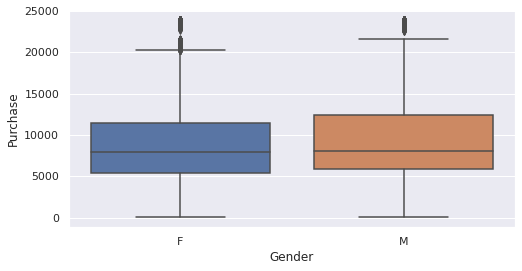

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=working_df)

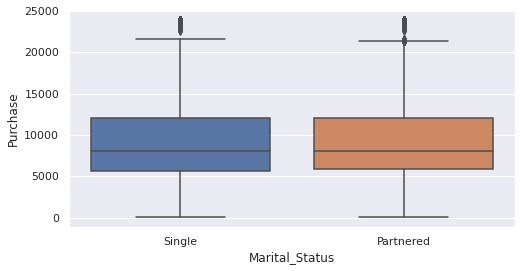

In [ ]:
sns.boxplot(x='Marital_Status', y='Purchase', data=working_df)

### Scatter Plot for Continuous Variables

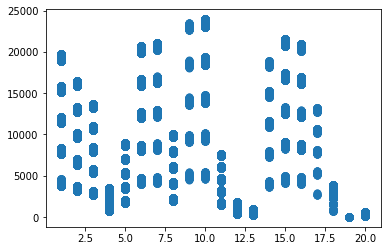

In [ ]:
# Association b/w Product Category and Purchase value
plt.scatter(working_df['Product_Category'], working_df['Purchase'], 
            linewidths=2,
            marker='o')

In [ ]:
# Highest fequecy of each Category attribute
working_df.describe(include='object').T

count unique        top    freq
Product_ID                  550068   3631  P00265242    1880
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821

In [ ]:
# Top 5 items ini each category
col_list = working_df.columns
for column in col_list:
  print(working_df[column].value_counts().head())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: User_ID, dtype: int64
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: Age, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
Name: Occupation, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
Single       324731
Partnered    225337
Name: Marital_Status, dtype: int64
5     150933
1     140378
8     113925
11     24287
2      23864
Name: Product_Category, dtype: int64
7011    191
7193    188
6855    187
6891    184
7012    183
Name: Purchase, dtype: int64


### Correlation Analyis using Pairplot, Heatmap

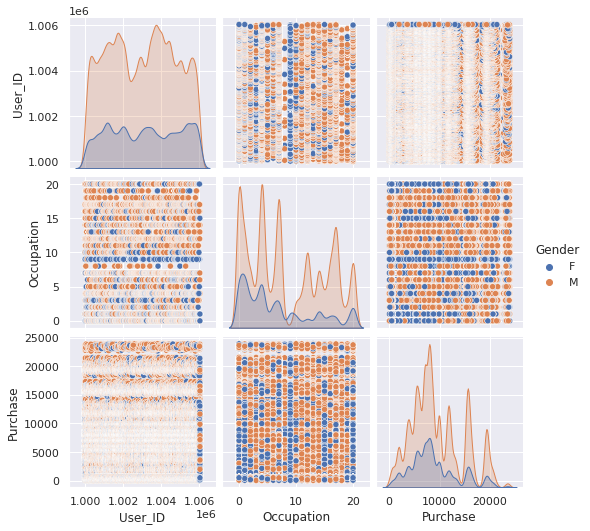

In [ ]:
sns.pairplot(working_df, hue='Gender')
plt.show()

In [ ]:
# Correlation
working_df.corr()

User_ID  Occupation  Product_Category  Purchase
User_ID           1.000000   -0.023971          0.003825  0.004716
Occupation       -0.023971    1.000000         -0.007618  0.020833
Product_Category  0.003825   -0.007618          1.000000 -0.343703
Purchase          0.004716    0.020833         -0.343703  1.000000

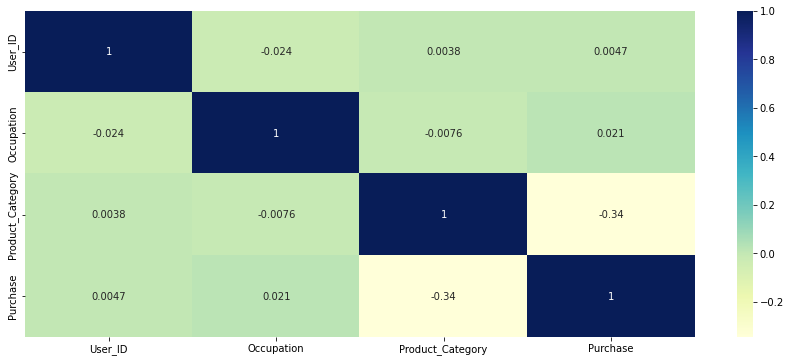

In [ ]:
# Correlation representation in Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(working_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
working_df.isnull().all(axis=0)

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool